In [1]:
import cnfgen as cnf
import networkx as nx
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob

In [32]:
## Pigeon Hole Principle

In [124]:

    
    for i in range(10):
        m_pigeon = random.randint(5, 10)
        n_hole = random.randint(11, 20)
        output_file = './php/php_' + str(i)+ '_m_'+ str(m_pigeon) + '_' + 'n_' +str(n_hole) + '.dimacs'
        with open(output_file, 'w') as myFile:
            F = cnf.PigeonholePrinciple(m_pigeon, n_hole)
            myFile.write(str(F.dimacs()))
            with open(output_file, 'r') as fin:
                data = fin.read().splitlines(True)
            with open(output_file,'w') as fout:
                fout.writelines(data[5:])

In [5]:
for count in range (25):
    k = random.randint(2, 5)
    n_vertices = random.randint(5, 10)
    c = 5 
    with open('./clique_cloring/php_' + str(n_vertices) + '_' + str(k) + '_' + str(k)+ '.dimacs', 'w') as myclique:
        clique = cnf.CliqueColoring(n_vertices, k, k)
        myclique.write(str(clique.dimacs()))
        with open('./clique_cloring/php_' + str(n_vertices) + '_' + str(k) + '_' + str(k)+ '.dimacs', 'r') as fin_clique:
            data_clique = fin_clique.read().splitlines(True)
        with open('./clique_cloring/php_' + str(n_vertices) + '_' + str(k) + '_' + str(k)+ '.dimacs', 'w') as fout_clique:
            fout_clique.writelines(data_clique[5:])

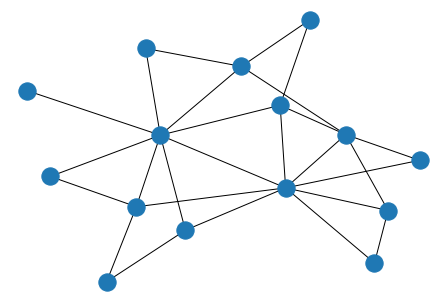

In [93]:
G = nx.barabasi_albert_graph(15, 2)
nx.draw_spring(G)

In [88]:
### RANDOM K CNF
for i in range (10):
    k_width_each_clause = 3
    n_number_of_veriable = 5
    threshold = [round(random.uniform(1, 4.5), 1), round(random.uniform(4.6, 10), 1)]
    m = random.randint(10,25)

    folder_sat = './random_sat_1.0/sat/' + '_k_'+str(k_width_each_clause) + '_n_'+ str(n_number_of_veriable) + '_m_' + str(m)+'.dimacs'
    with open(folder_sat, 'w') as mysat:
        random_sat = cnf.RandomKCNF(k_width_each_clause, n_number_of_veriable, m)
        mysat.write(str(random_sat.dimacs()[201:]))

0
1
2
3
4
5
6
7
8
9


In [16]:
k_width_each_clause = 3
n_number_of_veriable = np.arange(5, 10, 1)
m = np.arange(10, 50, 4)

for item in n_number_of_veriable:
        def gen_instance(n, m):
            for element in m:
                folder_sat_pair = './random_cnf_2.0/' + '_k_'+str(k_width_each_clause) + '_n_'+ str(item) + '_m_' + str(element)+'.dimacs'
                with open(folder_sat_pair, 'w') as mypair:
                    random_sat_pair = cnf.RandomKCNF(k_width_each_clause, item, element)
                    mypair.write(str(random_sat_pair.dimacs()))

                with open(folder_sat_pair, 'r') as fin:
                    data = fin.read().splitlines(True)
                with open(folder_sat_pair, 'w') as fout:
                    fout.writelines(data[5:])  
    


    # threshold = [round(random.uniform(1, 4.5), 1), round(random.uniform(4.6, 10), 1)]

    # m = random.randint(2 * n_number_of_veriable, 5 * n_number_of_veriable)

    # folder_sat = './random_sat_1.0/sat/' + '_k_'+str(k_width_each_clause) + '_n_'+ str(n_number_of_veriable) + '_m_' + str(m)+'.dimacs'
    # with open(folder_sat, 'w') as mysat:
    #     random_sat = cnf.RandomKCNF(k_width_each_clause, n_number_of_veriable, m)
    #     mysat.write(str(random_sat.dimacs()))

In [8]:
n = 5
k = 3
m1 = np.arange(10, 25, 1)
m2 = np.arange(5, 11, 1)
m3 = np.arange(5, 12, 1)
def create_instance(k, n, m):
    for element in m:
        for i in range(10):
            folder_sat_pair = './random_cnf_3.0/' + str(i)+ '_k_'+str(k) + '_n_'+ str(n) + '_m_' + str(element)+'.dimacs'
            with open(folder_sat_pair, 'w') as mypair:
                random_sat_pair = cnf.RandomKCNF(k, n, element)
                mypair.write(str(random_sat_pair.dimacs()))

            with open(folder_sat_pair, 'r') as fin:
                data = fin.read().splitlines(True)
            with open(folder_sat_pair, 'w') as fout:
                fout.writelines(data[5:]) 
            

In [9]:

create_instance(k, n, m1)


None
None
None
None
None
None
None
None
None
None


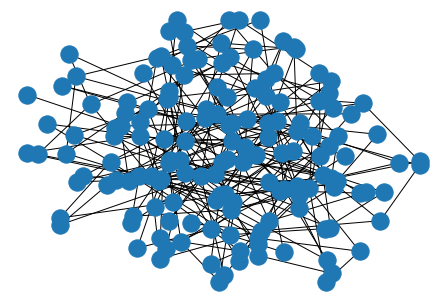

In [97]:
## Graph Coloring
for i in range(10):
    color = random.randint(3, 5)
    nodes = random.randint(14, 17)
    graph = nx.barabasi_albert_graph(nodes, 2)

    with open('./k_color/graph_color_' + str(color) + '_' + str(nodes) + '.dimacs', 'w') as myGraph:
        graph_color = cnf.GraphColoringFormula(graph, color)
        myGraph.write(str(graph_color.dimacs()))



In [101]:
import subprocess



In [10]:
def verify_with_minisat(dimacs_path):
    arr = os.listdir(dimacs_path)
    for i in range(len(arr)):
        cmd = ('minisat %s/%s' % (dimacs_path, arr[i]))
        # print((cmd))
        output = os.popen(cmd).read()
        if "SATISFIABLE" in output:
            print (arr[i] +': '+' SATISFIABLE')
        elif "UNSATISFIABLE" in output:
            print (arr[i] +": "+ ' UNSATISFIABLE')

In [204]:
path = './k_color'
verify_with_minisat(path)

graph_color_3_17.dimacs:  SATISFIABLE
graph_color_5_14.dimacs:  SATISFIABLE
graph_color_4_17.dimacs:  SATISFIABLE
graph_color_5_17.dimacs:  SATISFIABLE
graph_color_4_16.dimacs:  SATISFIABLE
graph_color_3_15.dimacs:  SATISFIABLE
graph_color_3_16.dimacs:  SATISFIABLE


In [217]:
clique_color = './clique_cloring'
verify_with_minisat(clique_color)

minisat ./clique_cloring/clique_5_50_50.dimacs
clique_5_50_50.dimacs:  SATISFIABLE
minisat ./clique_cloring/clique_9_41_41.dimacs
clique_9_41_41.dimacs:  SATISFIABLE
minisat ./clique_cloring/clique_6_34_34.dimacs
clique_6_34_34.dimacs:  SATISFIABLE
minisat ./clique_cloring/clique_17_36_36.dimacs


In [ ]:
# os.popen('minisat ./clique_cloring/clique_5_28_28.dimacs').read()

In [5]:
random_cnf = './random_sat_1.0/sat'
verify_with_minisat(random_cnf)

_k_3_n_5_m_19.dimacs:  SATISFIABLE
_k_3_n_10_m_29.dimacs:  SATISFIABLE
_k_3_n_10_m_49.dimacs:  SATISFIABLE
_k_3_n_10_m_31.dimacs:  SATISFIABLE
_k_3_n_5_m_15.dimacs:  SATISFIABLE
_k_3_n_5_m_16.dimacs:  SATISFIABLE
_k_3_n_10_m_27.dimacs:  SATISFIABLE
_k_3_n_5_m_20.dimacs:  SATISFIABLE
_k_3_n_5_m_22.dimacs:  SATISFIABLE
_k_3_n_5_m_10.dimacs:  SATISFIABLE
_k_3_n_10_m_36.dimacs:  SATISFIABLE
_k_3_n_10_m_22.dimacs:  SATISFIABLE
_k_3_n_10_m_28.dimacs:  SATISFIABLE
_k_3_n_5_m_21.dimacs:  SATISFIABLE
_k_3_n_10_m_39.dimacs:  SATISFIABLE
_k_3_n_10_m_50.dimacs:  SATISFIABLE
_k_3_n_5_m_18.dimacs:  SATISFIABLE
_k_3_n_5_m_23.dimacs:  SATISFIABLE


In [15]:
np.arange(10, 50, 4)

array([10, 14, 18, 22, 26, 30, 34, 38, 42, 46])

In [18]:
random_pair = './random_cnf_2.0/'
verify_with_minisat(random_pair)

_k_3_n_7_m_30.dimacs:  SATISFIABLE
_k_3_n_5_m_46.dimacs:  SATISFIABLE
_k_3_n_7_m_18.dimacs:  SATISFIABLE
_k_3_n_8_m_22.dimacs:  SATISFIABLE
_k_3_n_8_m_18.dimacs:  SATISFIABLE
_k_3_n_9_m_42.dimacs:  SATISFIABLE
_k_3_n_7_m_38.dimacs:  SATISFIABLE
_k_3_n_6_m_22.dimacs:  SATISFIABLE
_k_3_n_9_m_26.dimacs:  SATISFIABLE
_k_3_n_7_m_26.dimacs:  SATISFIABLE
_k_3_n_8_m_34.dimacs:  SATISFIABLE
_k_3_n_7_m_34.dimacs:  SATISFIABLE
_k_3_n_8_m_38.dimacs:  SATISFIABLE
_k_3_n_5_m_22.dimacs:  SATISFIABLE
_k_3_n_6_m_38.dimacs:  SATISFIABLE
_k_3_n_5_m_14.dimacs:  SATISFIABLE
_k_3_n_8_m_42.dimacs:  SATISFIABLE
_k_3_n_5_m_30.dimacs:  SATISFIABLE
_k_3_n_7_m_42.dimacs:  SATISFIABLE
_k_3_n_7_m_22.dimacs:  SATISFIABLE
_k_3_n_5_m_10.dimacs:  SATISFIABLE
_k_3_n_8_m_46.dimacs:  SATISFIABLE
_k_3_n_5_m_42.dimacs:  SATISFIABLE
_k_3_n_6_m_34.dimacs:  SATISFIABLE
_k_3_n_8_m_14.dimacs:  SATISFIABLE
_k_3_n_6_m_30.dimacs:  SATISFIABLE
_k_3_n_8_m_30.dimacs:  SATISFIABLE
_k_3_n_6_m_18.dimacs:  SATISFIABLE
_k_3_n_5_m_26.dimacs

In [ ]:
random_pair1 = './random_cnf_3.0/'
verify_with_minisat(random_pair1)

In [5]:
total_iteration_df = pd.read_csv('./output/iterations_truntime.csv')
all_iterations_df = pd.read_csv('./output/all_iterations.csv')
all_iterations_df['solution'] = all_iterations_df['solution'] + all_iterations_df['Unnamed: 4'] + all_iterations_df['Unnamed: 5'] + all_iterations_df['Unnamed: 6'] + all_iterations_df['Unnamed: 7']
all_iterations_df.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)
# all_iterations_df = all_iterations_df.fillna(0)
# all_iterations_df['dimacs'] = all_iterations_df['dimacs'].map(lambda x: x.lstrip('[0123456789_k_3_').rstrip('.dimacs]'))
# all_iterations_df.to_csv('new.csv')
all_iterations_df['solution'] = all_iterations_df['solution'].str.replace(r'(^.*False.*$)', "1")
all_iterations_df['solution'] = all_iterations_df['solution'].str.replace(r'(^.*True.*$)', "1")
all_iterations_df = all_iterations_df.fillna(0)
all_iterations_df['solution'] = all_iterations_df['solution'].astype(int)
all_iterations_df['dimacs'] = all_iterations_df['dimacs'].map(lambda x: x.lstrip('[0123456789_k_3_').rstrip('.dimacs]'))

In [4]:
# all_iterations_df.to_csv('all_iteration_inc_minisat.csv')

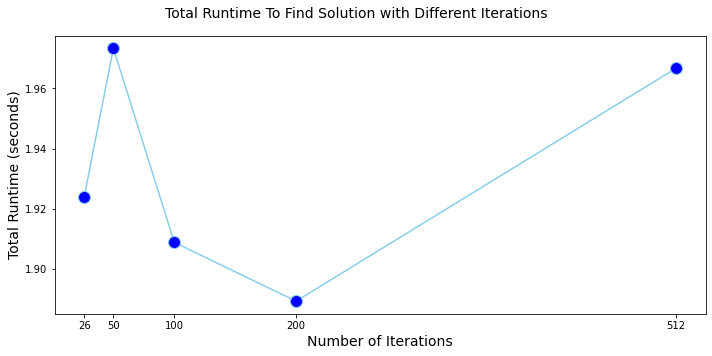

In [13]:
fig1 = plt.figure(figsize=(10, 5), constrained_layout=False)
ax1 = fig1.add_subplot(111)
ax1.plot('iterations', 'runtime', data=total_iteration_df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue')
ax1.set_xticks(np.flip(np.array(total_iteration_df['iterations'])))
ax1.set_xlabel("Number of Iterations", size = 14)
ax1.set_ylabel("Total Runtime (seconds)", size = 14)
fig1.suptitle("Total Runtime To Find Solution with Different Iterations", size = 14)
fig1.tight_layout()
fig1.subplots_adjust(top=0.90)
plt.show()

In [70]:
all_iterations_df

,iterations,dimacs,runtime,solution
0,26,n_5_m_10,0.0001,"[False,False,False,False,False]"
1,26,n_5_m_11,0.0189,0
2,26,n_5_m_12,0.0001,"[True,True,False,True,True]"
3,26,n_5_m_13,0.0184,0
4,26,n_5_m_14,0.0001,"[True,True,True,True,False]"
...,...,...,...,...
745,512,n_5_m_20,0.0172,0
746,512,n_5_m_21,0.0177,0
747,512,n_5_m_22,0.0186,0
748,512,n_5_m_23,0.0181,0


In [14]:
dimacs_wise_group_26 = all_iterations_df[all_iterations_df['iterations'] == 26].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_50 = all_iterations_df[all_iterations_df['iterations'] == 50].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_100 = all_iterations_df[all_iterations_df['iterations'] == 100].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_200 = all_iterations_df[all_iterations_df['iterations'] == 200].groupby(['dimacs']).mean().reset_index()
dimacs_wise_group_512 = all_iterations_df[all_iterations_df['iterations'] == 512].groupby(['dimacs']).mean().reset_index()

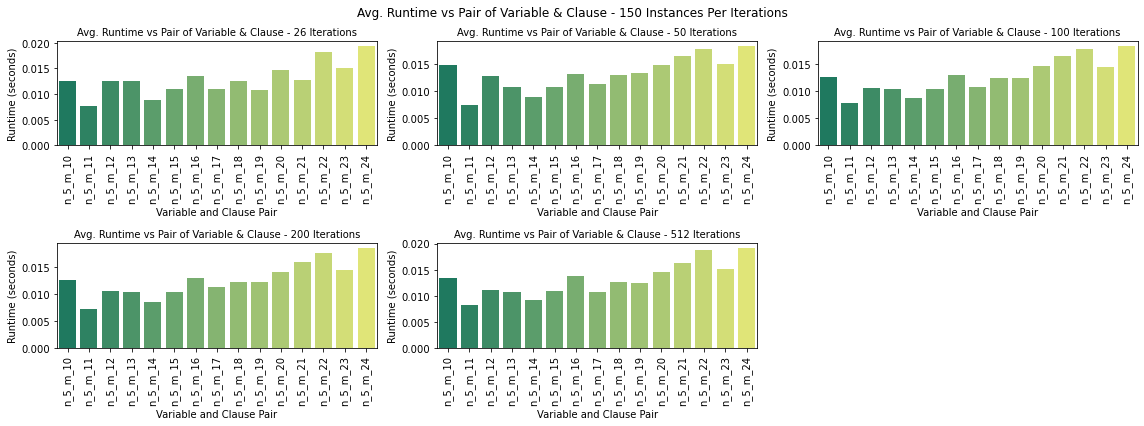

In [18]:
fig3 = plt.figure(figsize=(16, 6), constrained_layout=False)
ax4 = fig3.add_subplot(231)
ax4.set_title('Avg. Runtime vs Pair of Variable & Clause - 26 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_26, palette='summer')
ax4.set_xlabel('Variable and Clause Pair', size = 10)
ax4.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)
# ax4.set_xticks(rotation=90)

ax4 = fig3.add_subplot(232)
ax4.set_title('Avg. Runtime vs Pair of Variable & Clause - 50 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_50, palette='summer')
ax4.set_xlabel('Variable and Clause Pair', size = 10)
ax4.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

ax5 = fig3.add_subplot(233)
ax5.set_title('Avg. Runtime vs Pair of Variable & Clause - 100 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_100, palette='summer')
ax5.set_xlabel('Variable and Clause Pair', size = 10)
ax5.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

ax6 = fig3.add_subplot(234)
ax6.set_title('Avg. Runtime vs Pair of Variable & Clause - 200 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_200, palette='summer')
ax6.set_xlabel('Variable and Clause Pair', size = 10)
ax6.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

ax7 = fig3.add_subplot(235)
ax7.set_title('Avg. Runtime vs Pair of Variable & Clause - 512 Iterations', size=10)
sns.barplot(x='dimacs', y='runtime', data=dimacs_wise_group_512, palette='summer')
ax7.set_xlabel('Variable and Clause Pair', size = 10)
ax7.set_ylabel('Runtime (seconds)', size = 10)
plt.xticks(rotation=90)

fig3.suptitle("Avg. Runtime vs Pair of Variable & Clause - 150 Instances Per Iterations", size = 12)
fig3.tight_layout()
fig3.subplots_adjust(top=0.90)
plt.show()

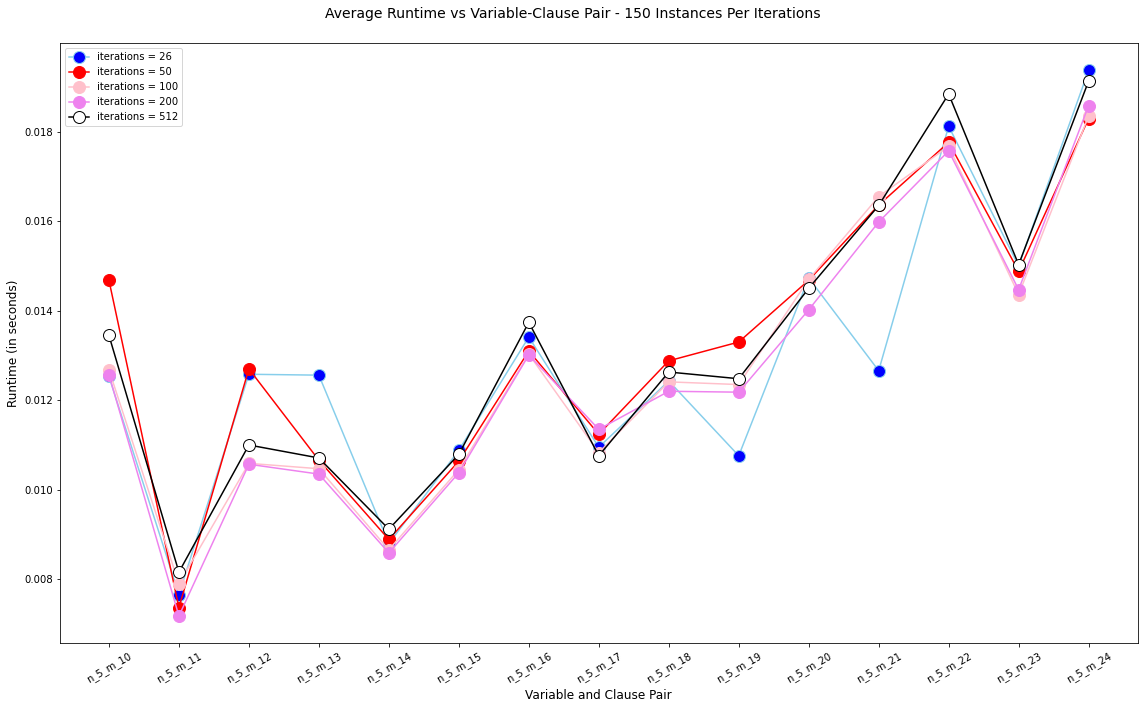

In [19]:
fig2 =  plt.figure(figsize=(16, 10), constrained_layout=False)
ax2 = fig2.add_subplot(111)
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_26, marker='o', markerfacecolor='blue', markersize=12, color='skyblue')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_50, marker='o', markerfacecolor='red', markersize=12, color='red')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_100, marker='o', markerfacecolor='pink', markersize=12, color='pink')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_200, marker='o', markerfacecolor='violet', markersize=12, color='violet')
ax2.plot('dimacs', 'runtime', data=dimacs_wise_group_512, marker='o', markerfacecolor='white', markersize=12, color='black')
ax2.legend(['iterations = 26', 'iterations = 50', 'iterations = 100', 'iterations = 200', 'iterations = 512'])
# ax2.set_title("Runtime (in seconds)", size=12)
ax2.set_xlabel("Variable and Clause Pair", size = 12)
plt.xticks(rotation=30)
ax2.set_ylabel("Runtime (in seconds)", size = 12)
fig2.suptitle("Average Runtime vs Variable-Clause Pair - 150 Instances Per Iterations", size = 14)
fig2.tight_layout()
fig2.subplots_adjust(top=0.93)
plt.show()

In [4]:
all_iterations_df

,iterations,dimacs,runtime,solution
0,26,n_5_m_10,0.0001,1
1,26,n_5_m_11,0.0189,0
2,26,n_5_m_12,0.0001,1
3,26,n_5_m_13,0.0184,0
4,26,n_5_m_14,0.0001,1
...,...,...,...,...
745,512,n_5_m_20,0.0172,0
746,512,n_5_m_21,0.0177,0
747,512,n_5_m_22,0.0186,0
748,512,n_5_m_23,0.0181,0


In [11]:
all_iterations_df.groupby(["dimacs", 'solution', 'iterations']).mean().reset_index().to_csv('filtered.csv')

In [67]:
# filtered_df = all_iterations_df[all_iterations_df['iterations'] == 26].groupby(['solution', 'dimacs']).agg("mean")
# filtered_df
group_by_26 = all_iterations_df[all_iterations_df['iterations'] == 26]
# group_by_26_1 = group_by_26[group_by_26['solution']=='1'].groupby('dimacs').agg('mean').reset_index()
group_by_26_1 = group_by_26[group_by_26['solution']== 1]
group_by_26_0 = group_by_26[group_by_26['solution']== 0].groupby('dimacs').agg('mean').reset_index()

In [99]:
# runtime = np.array(all_iterations_df['runtime'])
# solution_1 = np.array(all_iterations_df[all_iterations_df['solution'] ==1]['solution'])
# solution_0 = np.array(all_iterations_df[all_iterations_df['solution'] ==0]['solution'])
# iteration = np.array(all_iterations_df['iterations'])
# plt.stackplot(iteration, solution_1, solution_0)
# plt.show()

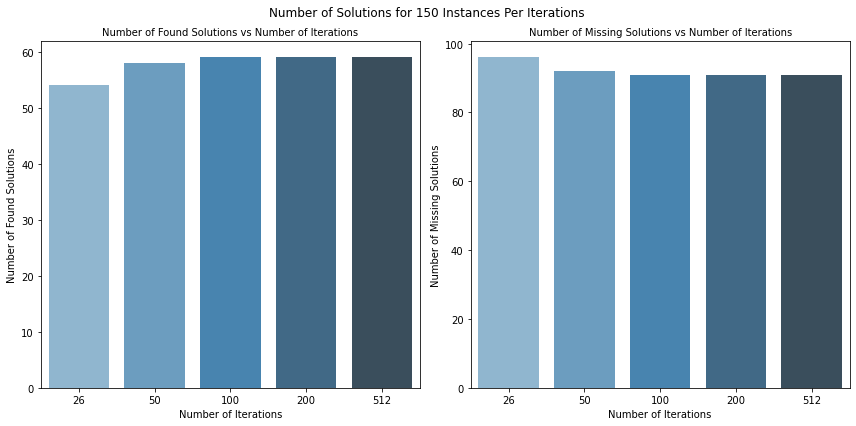

In [20]:
data_for_1 = all_iterations_df[all_iterations_df['solution']== 1].groupby(['iterations']).count().reset_index()
data_for_0 = all_iterations_df[all_iterations_df['solution']== 0].groupby(['iterations']).count().reset_index()
fig = plt.figure(figsize=(12, 6), constrained_layout=False)
ax9 = fig.add_subplot(121)
ax9.set_title('Number of Found Solutions vs Number of Iterations', size=10)
sns.barplot(x='iterations', y='solution', data=data_for_1, palette='Blues_d')
ax9.set_xlabel('Number of Iterations', size = 10)
ax9.set_ylabel('Number of Found Solutions', size = 10)

ax10 = fig.add_subplot(122)
ax10.set_title('Number of Missing Solutions vs Number of Iterations', size=10)
sns.barplot(x='iterations', y='solution', data=data_for_0, palette='Blues_d')
ax10.set_xlabel('Number of Iterations', size = 10)
ax10.set_ylabel('Number of Missing Solutions', size = 10)

fig.suptitle("Number of Solutions for 150 Instances Per Iterations ", size = 12)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(rotation=0)
plt.show()

In [80]:
# group_by_26 = all_iterations_df[all_iterations_df['iterations'] == 26]
# group_by_50 = all_iterations_df[all_iterations_df['iterations'] == 50]
# group_by_100 = all_iterations_df[all_iterations_df['iterations'] == 100]
# group_by_200 = all_iterations_df[all_iterations_df['iterations'] == 200]
# group_by_512 = all_iterations_df[all_iterations_df['iterations'] == 512]

# group_by_26_1 = group_by_26[group_by_26['solution']=='1'].groupby('dimacs').agg('mean').reset_index()
# group_by_26_1 = group_by_26[group_by_26['solution']== 1]
# group_by_26_0 = group_by_26[group_by_26['solution']== 0].groupby('dimacs').agg('mean').reset_index()
# group_by_26_1

<Figure size 1152x432 with 0 Axes>

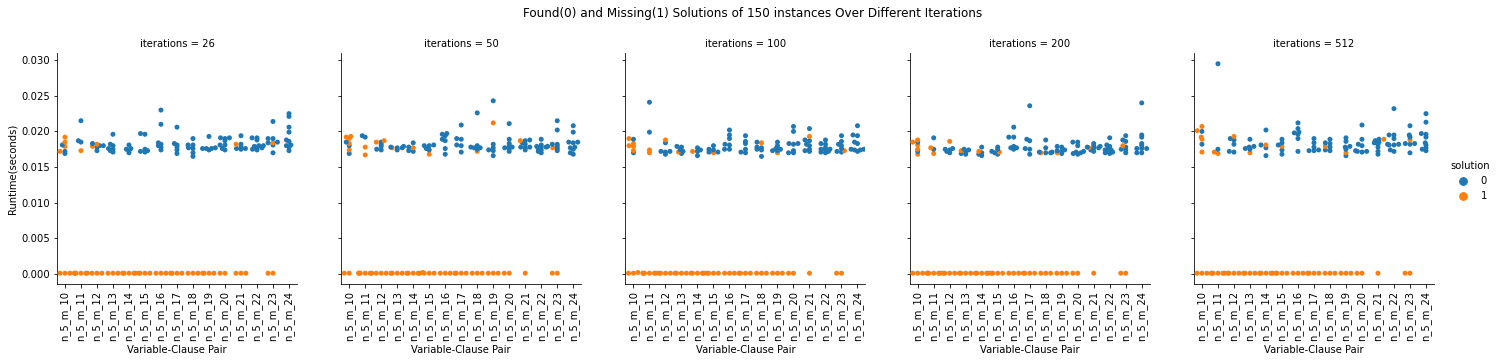

In [17]:
plt.figure(figsize=(16, 6), constrained_layout=False)
g = sns.catplot(x='dimacs', y='runtime', col = 'iterations',kind="swarm", hue = 'solution', data=all_iterations_df, height=8, aspect=.5)
plt.subplots_adjust(top=0.9, bottom=0.5)
g.set_axis_labels("Variable-Clause Pair",'Runtime(seconds)')
# g.set_xticklabels(np.array(all_iterations_df['dimacs'][0:15]))
g.set_xticklabels(rotation=90)
g.fig.suptitle('Found(0) and Missing(1) Solutions of 150 instances Over Different Iterations')
plt.show()

In [3]:
# ******************************************************
# MINISAT OUTPUT

In [6]:
filename_list = glob.glob("./output/minisat_output/*.txt")

In [81]:
words = ['./output/minisat_output/', '.dimacs.txt']
sat_minisat_ass = {}
for filename in filename_list:
    with open(filename, 'r') as fin:
        data = fin.read().splitlines(True)
        # print([" ".join([w for w in t.split() if not w in words]) for t in filename])
        # print(type(filename))
        new_filename = filename[25:38]
        output_data = data[-2:]
        if "UNSATISFIABLE" in output_data:
            output_data = UNSATISFIABLE
            # print("true")
        sat_minisat_ass[new_filename] = output_data

#  sat_minisat_ass_df = pd.DataFrame(sat_minisat_ass, columns=["dimacs"])   

In [82]:
sat_minisat_ass_df = pd.DataFrame.from_dict(sat_minisat_ass, orient='index', columns=['satisfiability', 'sat_ass']).reset_index()

In [67]:
sat_minisat_ass_df = sat_minisat_ass_df.replace('\n', '', regex=True)
sat_minisat_ass_df = sat_minisat_ass_df.replace('s', '', regex=True)
sat_minisat_ass_df.to_csv('./output/minisat_output.csv')

In [77]:
iteration_512 = all_iterations_df[all_iterations_df['iterations'] == 512].reset_index()

In [93]:
iteration_512.to_csv('./output/iteration_512.csv')

In [84]:
data_minisat = pd.read_csv('./output/minisat_output.csv')
data_minisat['dimacs'] = all_iterations_df['dimacs'].map(lambda x: x.lstrip('[0123456789_k_3_'))

In [92]:
data_minisat.to_csv('./output/data_minisat.csv')

In [89]:
pd.merge(iteration_512, data_minisat, on='dimacs', how='inner')

,index,iterations,dimacs,runtime,solution,satisfiability,sat_ass
0,600,512,n_5_m_10,0.0001,"[False,True,False,False,False]",SATISFIABLE,v 1 -2 -3 -4 5 0
1,600,512,n_5_m_10,0.0001,"[False,True,False,False,False]",SATISFIABLE,v 1 -2 -3 4 5 0
2,600,512,n_5_m_10,0.0001,"[False,True,False,False,False]",SATISFIABLE,v -1 -2 -3 -4 -5 0
3,600,512,n_5_m_10,0.0001,"[False,True,False,False,False]",SATISFIABLE,v 1 -2 3 -4 5 0
4,600,512,n_5_m_10,0.0001,"[False,True,False,False,False]",SATISFIABLE,v -1 2 3 4 5 0
...,...,...,...,...,...,...,...
1495,749,512,n_5_m_24,0.0181,0,SATISFIABLE,v -1 -2 3 -4 -5 0
1496,749,512,n_5_m_24,0.0181,0,SATISFIABLE,v -1 2 -3 -4 -5 0
1497,749,512,n_5_m_24,0.0181,0,SATISFIABLE,v -1 2 3 -4 5 0
1498,749,512,n_5_m_24,0.0181,0,SATISFIABLE,v -1 2 -3 4 -5 0


In [94]:
iteration_512_from_csv = pd.read_csv('./output/iteration_512.csv') 

In [95]:
iteration_512_from_csv = iteration_512_from_csv.replace('v', '', regex=True)

In [97]:
iteration_512_from_csv.to_csv('./output/iteration_512.csv')

In [6]:
all_iterations_minisat_df = pd.read_csv('./output/all_iteration_inc_minisat.csv')

In [7]:
all_iterations_minisat_df

,Unnamed: 0,iterations,dimacs,runtime,solution,minisat_satisfiability,minisat_solution
0,0,26,n_5_m_10,0.0001,"[False,False,False,False,False]",SATISFIABLE,v -1 -2 -3 -4 -5 0
1,1,26,n_5_m_11,0.0215,0,SATISFIABLE,v -1 -2 -3 -4 -5 0
2,2,26,n_5_m_12,0.0001,"[True,True,False,True,True]",SATISFIABLE,v -1 -2 -3 -4 5 0
3,3,26,n_5_m_13,0.0176,0,SATISFIABLE,v 1 -2 -3 4 -5 0
4,4,26,n_5_m_14,0.0001,"[True,True,True,True,False]",SATISFIABLE,v -1 2 -3 4 -5 0
...,...,...,...,...,...,...,...
745,745,512,n_5_m_20,0.0172,0,UNSATISFIABLE,0
746,746,512,n_5_m_21,0.0168,0,SATISFIABLE,v -1 2 -3 4 -5 0
747,747,512,n_5_m_22,0.0195,0,SATISFIABLE,v 1 -2 3 -4 5 0
748,748,512,n_5_m_23,0.0182,0,UNSATISFIABLE,0


In [36]:
true_sat = pd.read_csv('truly_iden_sat.csv')

In [37]:
true_sat

,iterations,truly_identified_sat,truly_identified_unsat,total_sat,total_instance
0,26,54,24,126,150
1,50,58,24,126,150
2,100,59,24,126,150
3,200,59,24,126,150
4,512,59,24,126,150


In [114]:
# # df = true_sat.pivot(columns='non_striker',index='iterations').fillna(0)
# #plot it
# true_sat[['truly_identified_sat', 'truly_identified_unsat', 'total_sat']].plot(kind='bar', stacked=True)
# plt.show()

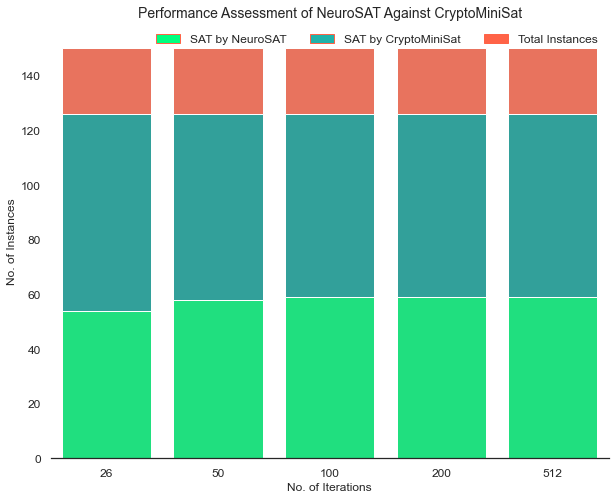

In [113]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (10, 8)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = true_sat['iterations'], y = true_sat['total_instance'], color = "tomato")

#Plot 2 - overlay - "bottom" series
middle_plot = sns.barplot(x = true_sat['iterations'], y = true_sat['total_sat'], color = "lightseagreen")

#Plot 3 - overlay - "bottom" series
bottom_plot = sns.barplot(x = true_sat['iterations'], y = true_sat['truly_identified_sat'], color = "springgreen")


topbar = plt.Rectangle((0,0),1,1,fc="tomato", edgecolor = 'tomato')
middlebar = plt.Rectangle((0,0),1,1,fc="lightseagreen", edgecolor = 'tomato')
bottombar = plt.Rectangle((0,0),1,1,fc='springgreen',  edgecolor = 'tomato')
l = plt.legend([bottombar, middlebar, topbar], ['SAT by NeuroSAT', 'SAT by CryptoMiniSat', 'Total Instances'], loc=0, ncol = 3, prop={'size':12})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True, offset = 0)
bottom_plot.set_ylim(0, 159)
bottom_plot.set_ylabel("No. of Instances")
bottom_plot.set_xlabel("No. of Iterations")
bottom_plot.set_title('Performance Assessment of NeuroSAT Against CryptoMiniSat', size=14)

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(12)